In [1]:
from chebGreen.greenlearning.utils import DataProcessor
from chebGreen.greenlearning.model import *
from chebGreen.backend import plt
from chebGreen.utils import runCustomScript

# %env TF_MLC_LOGGING=1
# %env TF_CPP_MIN_LOG_LEVEL=2

In [2]:
example = 'mean_condition'
script = 'generate_example'

In [3]:
# %%time
# theta = 1
# runCustomScript(script, example, theta)

In [4]:
data = DataProcessor("datasets/mean_condition/1.00.mat")
data.generateDataset(trainRatio = 0.95)

In [5]:
model = GreenNN()
dimension = 1
domain = [-1,1,-1,1]
layerConfig = [50,50,50,50]
activation = 'rational'
homogeneousBC = False
model.build(dimension = dimension, domain = domain, layerConfig = layerConfig, activation = activation, homogeneousBC = homogeneousBC)

In [6]:
%%time
lossHistory = model.train(data, epochs = {'adam':int(5000), 'lbfgs':int(0)})

Training with Adam:
Loss at epoch 100: Training = 2.911E-03, Validation = 2.765E-03
Loss at epoch 200: Training = 2.302E-04, Validation = 2.579E-04
Loss at epoch 300: Training = 1.635E-04, Validation = 1.746E-04
Loss at epoch 400: Training = 1.415E-04, Validation = 1.447E-04
Loss at epoch 500: Training = 1.244E-04, Validation = 1.228E-04
Loss at epoch 600: Training = 1.106E-04, Validation = 1.080E-04
Loss at epoch 700: Training = 9.966E-05, Validation = 9.814E-05
Loss at epoch 800: Training = 9.072E-05, Validation = 9.084E-05
Loss at epoch 900: Training = 8.321E-05, Validation = 8.462E-05
Loss at epoch 1000: Training = 7.675E-05, Validation = 7.905E-05
Loss at epoch 1100: Training = 7.111E-05, Validation = 7.401E-05
Loss at epoch 1200: Training = 6.612E-05, Validation = 6.938E-05
Loss at epoch 1300: Training = 6.165E-05, Validation = 6.508E-05
Loss at epoch 1400: Training = 5.759E-05, Validation = 6.105E-05
Loss at epoch 1500: Training = 5.388E-05, Validation = 5.725E-05
Loss at epoch 

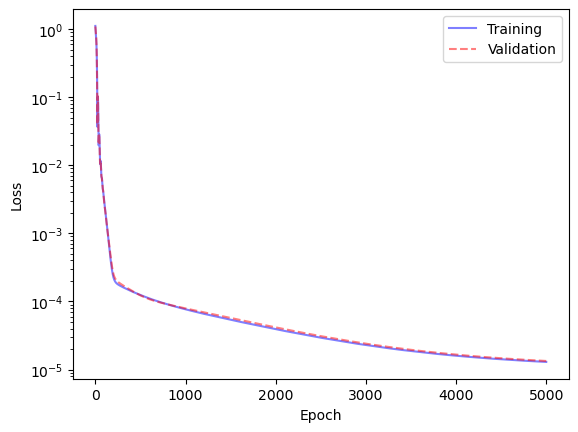

In [7]:
plt.figure()
plt.semilogy(range(len(lossHistory['training'])), lossHistory['training'], 'b', alpha = 0.5)
plt.semilogy(range(len(lossHistory['validation'])), lossHistory['validation'], 'r--', alpha = 0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])

In [8]:
# model = GreenNN()
# model.build(dimension = 1, domain = [-1,1,-1,1], layerConfig = [50,50,50,50], activation = 'rational', homogeneousBC = False, loadPath = 'savedModels/mean_condition/1.00')

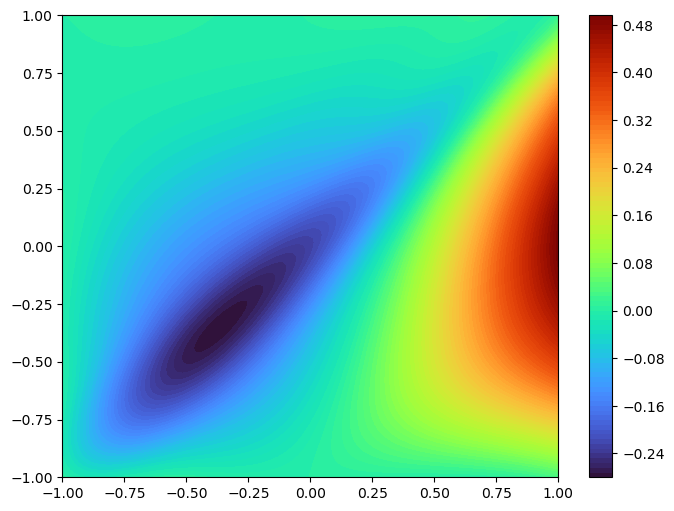

In [9]:
xF, xU = data.xF, data.xU
x, y = np.meshgrid(xU, xF)
G = model.evaluateG(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,G, 100, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

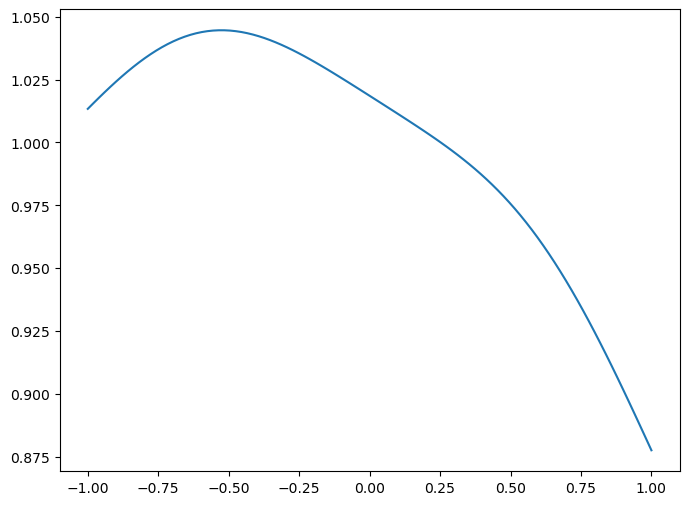

In [10]:
u_hom = model.evaluateN(xU)

fig = plt.figure(figsize = (8,6))
plt.plot(xU, u_hom)

In [11]:
model.saveModels('savedModels/mean')